In [98]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
import tensorflow as tf
from tensorflow import keras

In [16]:
df  = pd.read_csv("C:/Users/Bharath/Desktop/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2909,9619-GSATL,Female,0,No,No,43,Yes,No,DSL,No,...,No,Yes,No,No,One year,No,Electronic check,55.45,2444.25,No
4284,8189-XRIKE,Female,1,No,No,32,Yes,No,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,No,Electronic check,90.95,2897.95,No
2133,8051-HJRLT,Female,1,No,No,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.55,70.55,Yes
713,5433-KYGHE,Female,0,No,Yes,14,Yes,Yes,Fiber optic,Yes,...,No,Yes,No,No,Month-to-month,Yes,Mailed check,86.00,1164.05,No
1233,1299-AURJA,Female,0,Yes,Yes,70,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),24.70,1685.9,No


In [17]:
df.drop('customerID',axis='columns',inplace=True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [19]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [24]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [25]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [26]:
df1 = df[df.TotalCharges!=' ']

In [32]:
pd.to_numeric(df1.TotalCharges)

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7032, dtype: float64

In [73]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService      object
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract             object
PaperlessBilling      int64
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

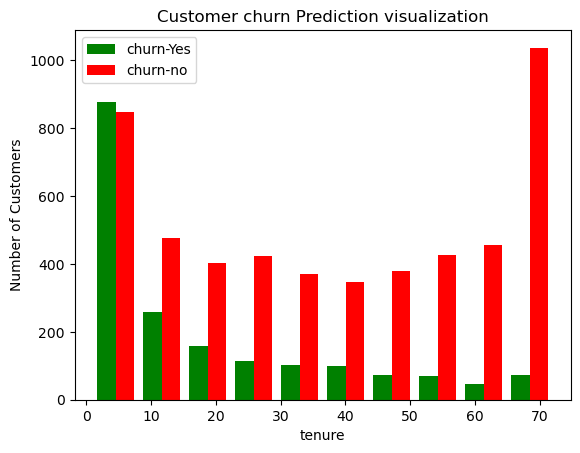

In [46]:
tenure_churn_no=df1[df1.Churn=='No'].tenure
tenure_churn_yes=df1[df1.Churn=='Yes'].tenure
plt.xlabel('tenure')
plt.ylabel('Number of Customers')
plt.title('Customer churn Prediction visualization')
plt.hist([tenure_churn_yes,tenure_churn_no],color=['green','red'],label=['churn-Yes','churn-no'])
plt.legend()

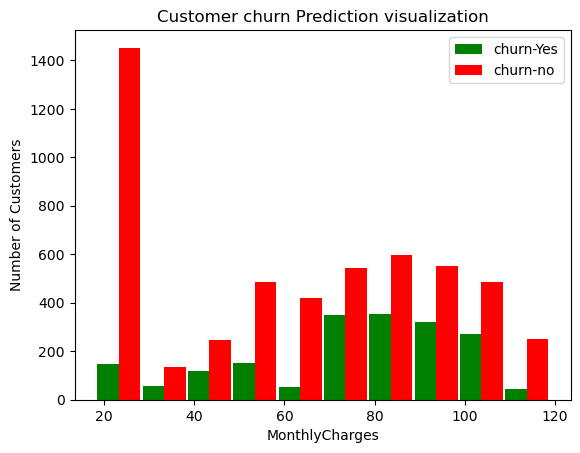

In [50]:
mc_churn_no=df1[df1.Churn=='No'].MonthlyCharges
mc_churn_yes=df1[df1.Churn=='Yes'].MonthlyCharges
plt.xlabel('MonthlyCharges')
plt.ylabel('Number of Customers')
plt.title('Customer churn Prediction visualization')
plt.hist([mc_churn_yes,mc_churn_no],rwidth=0.95,color=['green','red'],label=['churn-Yes','churn-no'])
plt.legend()

In [87]:
def print_unique_col_values(df):
    for column in df:
        
        print(f' {column} : {df[column].unique()}')
print_unique_col_values(df1)

 gender : [1 0]
 SeniorCitizen : [0 1]
 Partner : [1 0]
 Dependents : [0 1]
 tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
 PhoneService : [0 1]
 MultipleLines : [0 1]
 InternetService : ['DSL' 'Fiber optic' 'No']
 OnlineSecurity : [0 1]
 OnlineBackup : [1 0]
 DeviceProtection : [0 1]
 TechSupport : [0 1]
 StreamingTV : [0 1]
 StreamingMovies : [0 1]
 Contract : ['Month-to-month' 'One year' 'Two year']
 PaperlessBilling : [1 0]
 PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
 MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
 TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
 Churn : [0 1]


In [63]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

C:\Users\Bharath\AppData\Local\Temp\ipykernel_28108\2045096646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No',inplace=True)
C:\Users\Bharath\AppData\Local\Temp\ipykernel_28108\2045096646.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No',inplace=True)


In [69]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport',
                 'StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

C:\Users\Bharath\AppData\Local\Temp\ipykernel_28108\2625757751.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({'Yes': 1,'No': 0},inplace=True)


In [75]:
df1['gender'].replace({'Female': 1,'Male': 0},inplace=True)

C:\Users\Bharath\AppData\Local\Temp\ipykernel_28108\3292495191.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Female': 1,'Male': 0},inplace=True)


In [89]:
df2 = pd.get_dummies(data = df1,columns=['InternetService','Contract','PaymentMethod']) #Create one hot encoding for columns 
#which has more than one text value.
print_unique_col_values(df2)

 gender : [1 0]
 SeniorCitizen : [0 1]
 Partner : [1 0]
 Dependents : [0 1]
 tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
 PhoneService : [0 1]
 MultipleLines : [0 1]
 OnlineSecurity : [0 1]
 OnlineBackup : [1 0]
 DeviceProtection : [0 1]
 TechSupport : [0 1]
 StreamingTV : [0 1]
 StreamingMovies : [0 1]
 PaperlessBilling : [1 0]
 MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
 TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
 Churn : [0 1]
 InternetService_DSL : [1 0]
 InternetService_Fiber optic : [0 1]
 InternetService_No : [0 1]
 Contract_Month-to-month : [1 0]
 Contract_One year : [0 1]
 Contract_Two year : [0 1]
 PaymentMethod_Bank transfer (automatic) : [0 1]
 PaymentMethod_Credit card (automatic) : [0 1]
 PaymentMethod_Electronic check : [1 0]
 PaymentMethod_Mailed 

In [90]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4186,0,0,0,1,62,1,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
5047,0,0,0,0,39,1,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
5197,1,0,1,0,72,1,1,0,1,1,...,0,1,0,0,0,1,0,0,1,0
4847,1,1,0,0,37,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
654,1,1,0,0,8,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0


In [94]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])
df2[cols_to_scale]

,tenure,MonthlyCharges,TotalCharges
0,0.000000,0.115423,0.001275
1,0.464789,0.385075,0.215867
2,0.014085,0.354229,0.010310
3,0.619718,0.239303,0.210241
4,0.014085,0.521891,0.015330
...,...,...,...
7038,0.323944,0.662189,0.227521
7039,1.000000,0.845274,0.847461
7040,0.140845,0.112935,0.037809
7041,0.042254,0.558706,0.033210


In [97]:
X=df2.drop('Churn',axis='columns')
y = df2['Churn']

In [129]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=5)

model = keras.Sequential([
    keras.layers.Dense(22,input_shape=(26,),activation='relu'),
    keras.layers.Dense(8,input_shape=(26,),activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
176/176 [==============================] - 1s 2ms/step - loss: 0.5142 - accuracy: 0.7390
Epoch 2/10
176/176 [==============================] - 0s 2ms/step - loss: 0.4408 - accuracy: 0.7792
Epoch 3/10
176/176 [==============================] - 0s 2ms/step - loss: 0.4256 - accuracy: 0.7970
Epoch 4/10
176/176 [==============================] - 0s 2ms/step - loss: 0.4190 - accuracy: 0.7980
Epoch 5/10
176/176 [==============================] - 0s 2ms/step - loss: 0.4155 - accuracy: 0.8027
Epoch 6/10
176/176 [==============================] - 0s 2ms/step - loss: 0.4127 - accuracy: 0.8048
Epoch 7/10
176/176 [==============================] - 0s 2ms/step - loss: 0.4112 - accuracy: 0.8076
Epoch 8/10
176/176 [==============================] - 0s 2ms/step - loss: 0.4090 - accuracy: 0.8069
Epoch 9/10
176/176 [==============================] - 0s 2ms/step - loss: 0.4081 - accuracy: 0.8096
Epoch 10/10
176/176 [==============================] - 0s 2ms/step - loss: 0.4060 - accuracy: 0.8100

In [138]:
model.evaluate(X_test,y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.4400 - accuracy: 0.7982


array([1.4258225], dtype=float32)

In [142]:
yp = model.predict(X_test)
ypred = []
for i in yp:
    if i<=0.5:
        ypred.append(0)
    else:
        ypred.append(1)
print(y_test[:10])
print(ypred[:10])

44/44 [==============================] - 0s 2ms/step
2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64
[0, 0, 0, 1, 1, 1, 0, 1, 0, 0]


In [147]:
from sklearn.metrics import confusion_matrix, classification_report
cm = tf.math.confusion_matrix(labels=y_test,predictions=ypred)
cm

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[890, 109],
       [175, 233]])>

In [149]:
# Calculate accuracy from confusion matrix. Accuracy = correct predictions/total predictions
Accuracy = (890+233)/(890+233+109+175)
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86       999
           1       0.68      0.57      0.62       408

    accuracy                           0.80      1407
   macro avg       0.76      0.73      0.74      1407
weighted avg       0.79      0.80      0.79      1407

